In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Suicides in India 2001-2012.csv")

In [3]:
data.head(5)

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0


In [4]:
data.isna().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.Type.value_counts()

Others (Please Specify)                           7263
By Consuming Other Poison                         4200
Family Problems                                   4200
Unemployed                                        4200
Physical Abuse (Rape/Incest Etc.)                 4200
Cancer                                            4200
By Over Alcoholism                                4200
By Fire-Arms                                      4200
Public Sector Undertaking                         4200
Drug Abuse/Addiction                              4200
Causes Not known                                  4200
By Consuming Insecticides                         4200
Cancellation/Non-Settlement of Marriage           4200
Professional/Career Problem                       4200
Poverty                                           4200
Farming/Agriculture Activity                      4200
Illness (Aids/STD)                                4200
Divorce                                           4200
Service (G

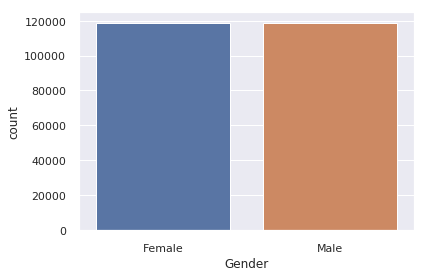

In [12]:
sns.set(style ="darkgrid")
sns.countplot(x='Gender',data= data)

In [15]:
data.Total.tail(10)

237509     200
237510    3927
237511     182
237512     455
237513    1513
237514     149
237515     233
237516    5451
237517     189
237518    2658
Name: Total, dtype: int64

In [44]:
data.Type_code.value_counts()

Causes                  39531
Means_adopted           29337
Professional_Profile    23291
Name: Type_code, dtype: int64

In [13]:
data.Type.value_counts()

Others (Please Specify)                           7263
By Consuming Other Poison                         4200
Family Problems                                   4200
Unemployed                                        4200
Physical Abuse (Rape/Incest Etc.)                 4200
Cancer                                            4200
By Over Alcoholism                                4200
By Fire-Arms                                      4200
Public Sector Undertaking                         4200
Drug Abuse/Addiction                              4200
Causes Not known                                  4200
By Consuming Insecticides                         4200
Cancellation/Non-Settlement of Marriage           4200
Professional/Career Problem                       4200
Poverty                                           4200
Farming/Agriculture Activity                      4200
Illness (Aids/STD)                                4200
Divorce                                           4200
Service (G

In [14]:
data.Age_group.value_counts()

15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group, dtype: int64

In [15]:
data.State.value_counts()

Madhya Pradesh       6792
Karnataka            6792
Maharashtra          6792
Odisha               6791
Andhra Pradesh       6791
Rajasthan            6791
Chhattisgarh         6790
Bihar                6790
Haryana              6790
Kerala               6788
Uttar Pradesh        6787
Assam                6786
Gujarat              6786
Tamil Nadu           6786
Jharkhand            6785
Tripura              6782
Delhi (Ut)           6782
West Bengal          6780
Punjab               6779
Himachal Pradesh     6774
Jammu & Kashmir      6761
Goa                  6759
Uttarakhand          6758
Sikkim               6742
Mizoram              6737
Meghalaya            6733
Puducherry           6730
Chandigarh           6717
A & N Islands        6712
Daman & Diu          6710
Arunachal Pradesh    6707
Nagaland             6705
D & N Haveli         6704
Manipur              6700
Lakshadweep          6674
Total (Uts)           312
Total (States)        312
Total (All India)     312
Name: State,

In [17]:
# Drop rows where total is zero.
data= data.drop(data[data['Total']==0].index)

In [18]:
data[data['Total']==0]

,State,Year,Type_code,Type,Gender,Age_group,Total


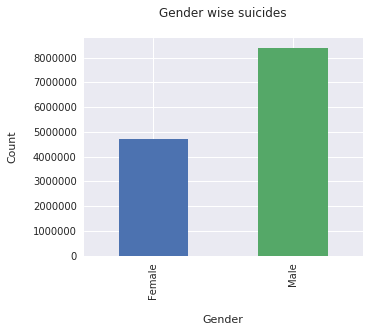

In [20]:
gender = data.groupby('Gender').sum()['Total'].plot("bar", figsize=(5,4), title ="Gender wise suicides\n");
gender.set_xlabel('\nGender')
gender.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.cubehelix_palette(8);

In [26]:
data.tail()

,State,Year,Type_code,Type,Gender,Age_group,Total
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189
237518,West Bengal,2012,Social_Status,Never Married,Male,0-100+,2658


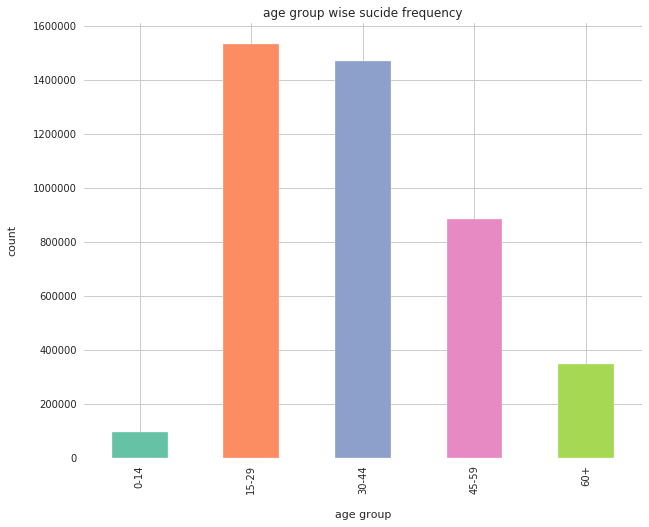

In [30]:
data = data[data['Age_group']!='0-100+']
age = data.groupby('Age_group').sum()['Total'].plot("bar" ,figsize=(10,8),title="age group wise sucide frequency" );
age.set_xlabel('\nage group')
age.set_ylabel('count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

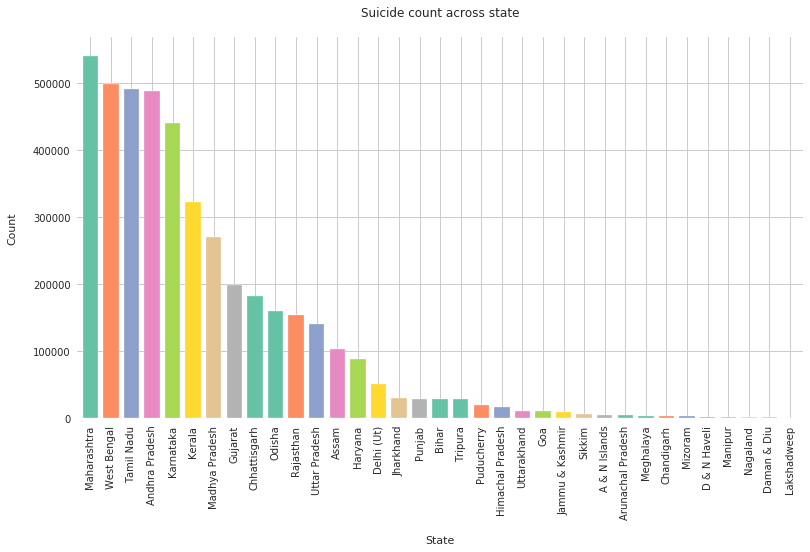

In [32]:
state = data.groupby('State').sum()['Total']
sort_state = state.sort_values(ascending = False)
state = sort_state.plot("bar",figsize = (13,7), title = 'Suicide count across state\n', width = 0.75)

state.set_xlabel('\nState')
state.set_ylabel('Count\n')
sns.set_style('whitegrid')
sns.set_palette('Set2');

In [34]:
cause = data[data['Type_code'] == 'Causes']
edu_status = data[data['Type_code'] == 'Education_Status']
means_adpt = data[data['Type_code'] == 'Means_adopted']
prof = data[data['Type_code'] == 'Professional_Profile']
soc_status = data[data['Type_code'] == 'Social_Status']

In [35]:
def plot_type(df,Title,X_lab):
    p_type = df.groupby('Type').sum()['Total']
    sort_df = p_type.sort_values(ascending =False)
    
    fig = sort_df.plot('bar', figsize =(10,7),title = Title+'\n',width =0.75)
    fig.set_xlabel('\n' + X_lab )
    fig.set_ylabel('Count\n')
    sns.set_style('whitegrid')
    sns.set_palette('Set2');   

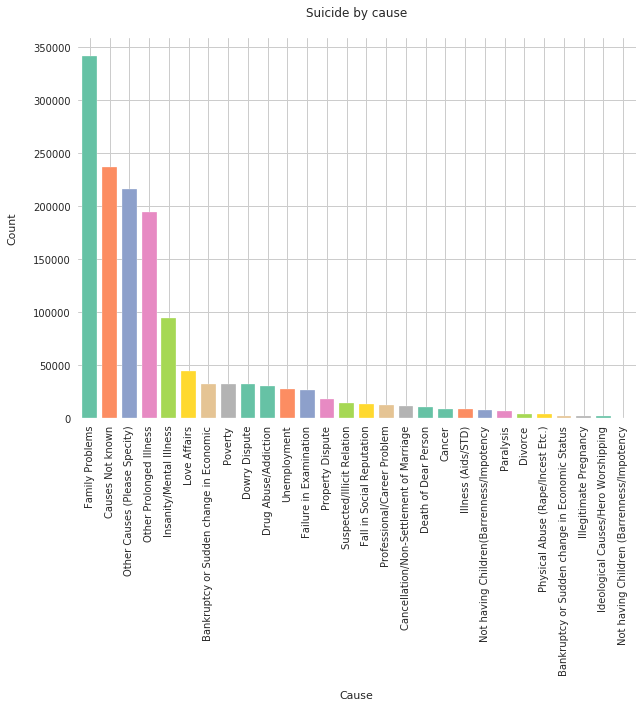

In [36]:
# plot by cause
plot_type(cause, 'Suicide by cause', 'Cause')

In [43]:
data['Type_code'].head()

13    Causes
20    Causes
32    Causes
47    Causes
54    Causes
Name: Type_code, dtype: object

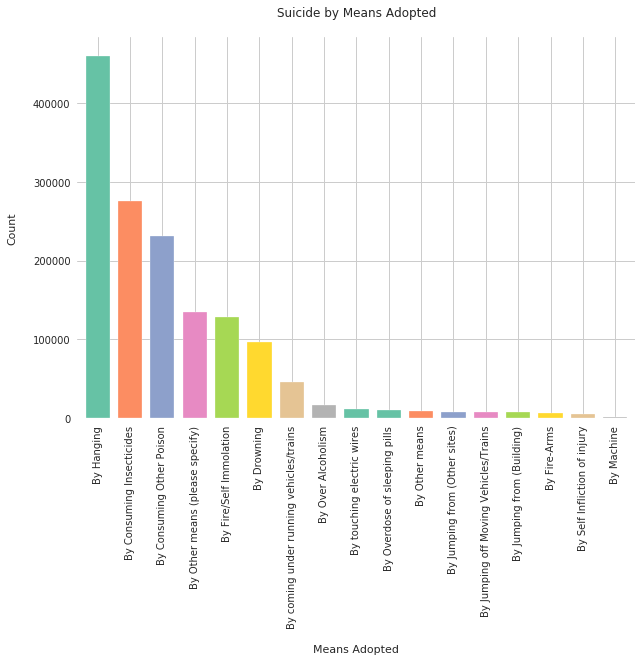

In [45]:
# plot by means adopted
plot_type(means_adpt, 'Suicide by Means Adopted', 'Means Adopted')


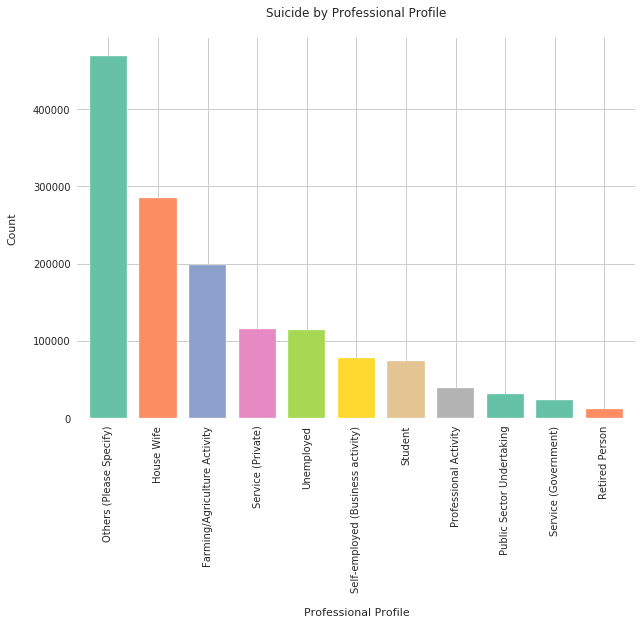

In [46]:
# suicide by professional profile
plot_type(prof, 'Suicide by Professional Profile', 'Professional Profile')